## ASSIGNMENT 5 - CLUSTERING

**Objective:**
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

**Dataset**
Use the Iris dataset available in the sklearn library.

In [5]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

**1. Loading and Preprocessing**

●	Load the Iris dataset from sklearn.

●	Drop the species column since this is a clustering problem.

In [39]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
# Using the data and feature names from the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# Add the species column to the DataFrame (optional if you want to verify it exists first)
df['species'] = iris.target

# Drop the species column since this is a clustering problem
df_without_species = df.drop(columns=['species'])

# Display the resulting DataFrame
print(df_without_species.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [43]:
# Display data type of each column
print("Dataset Info:")
df_without_species.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [45]:
# Display Statistical summary of the dataset
print("Statistical Summary:")
df_without_species.describe()

Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
# Display Null Values
print("Null values in each column:")
print(df_without_species.isnull().sum())

Null values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [49]:
# Finding duplicate count in the dataset
df_without_species.duplicated().sum()

1

In [51]:
df_without_species.shape

(150, 4)

In [53]:
df_without_species.drop_duplicates(inplace=True)

In [55]:
df_without_species.shape

(149, 4)

In [57]:
# FEATURE SCALING

# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform standard scaling on the dataset (excluding the species column)
scaled_data = scaler.fit_transform(df_without_species)

# Create a new DataFrame for the scaled data
scaled_df = pd.DataFrame(data=scaled_data, columns=iris.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.898033          1.012401          -1.333255         -1.308624
1          -1.139562         -0.137353          -1.333255         -1.308624
2          -1.381091          0.322549          -1.390014         -1.308624
3          -1.501855          0.092598          -1.276496         -1.308624
4          -1.018798          1.242352          -1.333255         -1.308624


**2.Clustering Algorithm Implementation**

●	Implement the following two clustering algorithms:

**A) KMeans Clustering**

●	Provide a brief description of how KMeans clustering works.
    
●	Explain why KMeans clustering might be suitable for the Iris dataset.

●	Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

**Description of KMeans Clustering**

**KMeans** is a popular clustering algorithm that partitions data into K clusters. The steps are as follows:

● **Initialize Centroids:** Select K initial cluster centroids randomly.
    
● **Assign Points to Clusters:** Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).

● **Update Centroids:** Recalculate the centroids as the mean of all points assigned to a cluster.

● **Iterate:** Repeat steps 2 and 3 until the centroids no longer change or a maximum number of iterations is reached.

**Suitability for the Iris Dataset**

The Iris dataset has well-defined clusters corresponding to three species: Setosa, Versicolor, and Virginica. KMeans clustering is effective for datasets where natural groupings exist because it tries to partition data points into compact clusters. The four numerical features in the Iris dataset (sepal length, sepal width, petal length, and petal width) provide a solid foundation for clustering.

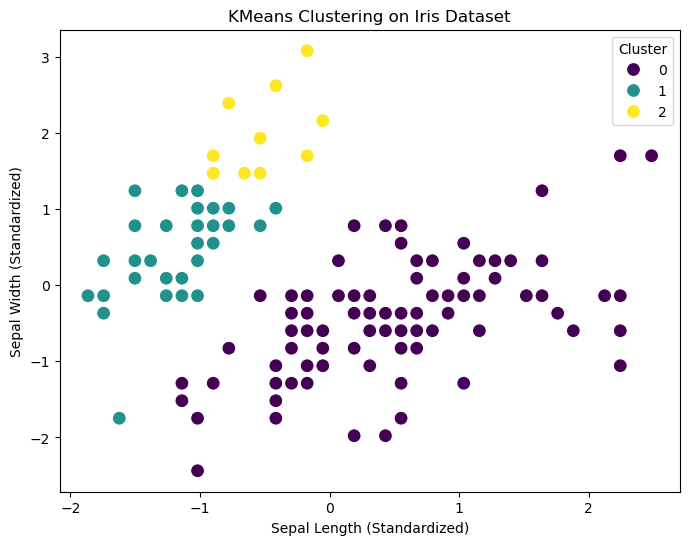

In [62]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans with 3 clusters (since the Iris dataset has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(scaled_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame for visualization
scaled_df['cluster'] = cluster_labels

# Visualize the clusters using a scatter plot
# We'll use the first two features for simplicity
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # sepal length
    y=scaled_df.iloc[:, 1],  # sepal width
    hue=scaled_df['cluster'],  # color by cluster
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(title='Cluster')
plt.show()

**B) Hierarchical Clustering**

●	Provide a brief description of how Hierarchical clustering works.

●	Explain why Hierarchical clustering might be suitable for the Iris dataset.

●	Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

**Description of Hierarchical Clustering**

**Hierarchical clustering** is a method of clustering that builds a hierarchy of clusters either in a bottom-up (agglomerative) or top-down (divisive) manner.

**Steps of Agglomerative Hierarchical Clustering:**

● **Treat Each Data Point as a Cluster:** Initially, each data point is treated as its own cluster.

● **Compute Distances:** Compute pairwise distances between clusters using a linkage criterion (e.g., single, complete, average linkage).

● **Merge Clusters:** Merge the two closest clusters based on the chosen distance metric.

● **Repeat:** Continue merging clusters until all points are in a single cluster or a stopping criterion is met.

**Suitability for the Iris Dataset**

**Hierarchical clustering** is well-suited for the Iris dataset because:

1. It can reveal hierarchical relationships among clusters, which may exist naturally in the dataset.

2. It doesn’t require specifying the number of clusters upfront, unlike KMeans.

3. The dendrogram provides an insightful way to explore possible cluster structures and verify the suitability of the dataset for clustering.

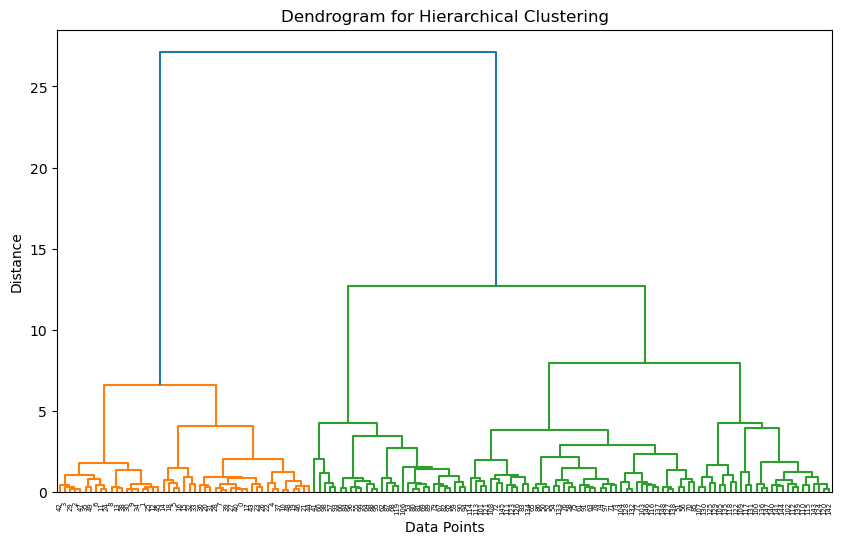

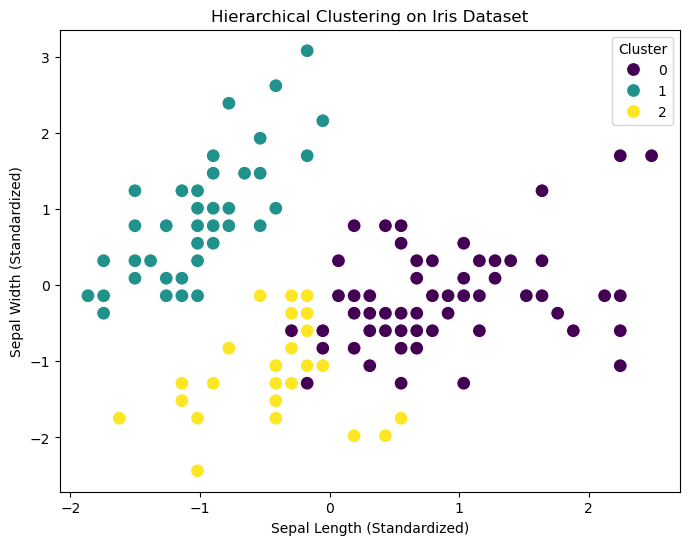

In [69]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix
linkage_matrix = linkage(scaled_df.iloc[:, :-1], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fit the model and predict cluster labels
hierarchical_labels = hierarchical.fit_predict(scaled_df.iloc[:, :-1])

# Add the cluster labels to the DataFrame
scaled_df['hierarchical_cluster'] = hierarchical_labels

# Visualize the clusters using a scatter plot (first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # sepal length
    y=scaled_df.iloc[:, 1],  # sepal width
    hue=scaled_df['hierarchical_cluster'],  # color by cluster
    palette='viridis',
    s=100
)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(title='Cluster')
plt.show()

### Model Evaluation

In [72]:
# Import necessary libraries
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for KMeans clustering
kmeans_silhouette = silhouette_score(scaled_df.iloc[:, :-2], cluster_labels)
print(f"Silhouette Score for KMeans Clustering: {kmeans_silhouette:.3f}")

# Calculate the silhouette score for Hierarchical clustering
hierarchical_silhouette = silhouette_score(scaled_df.iloc[:, :-2], hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}")

Silhouette Score for KMeans Clustering: 0.494
Silhouette Score for Hierarchical Clustering: 0.450


***KMeans Clustering Silhouette Score: 0.494***

***Hierarchical Clustering Silhouette Score: 0.450***

### Interpretation:

**Silhouette Score Comparison:**

The silhouette score for KMeans clustering is slightly higher than that for Hierarchical clustering. A higher silhouette score indicates that the clusters are more compact and well-separated from each other, meaning the clustering is of higher quality.

**Better Model:**

In this case, **KMeans Clustering** performs slightly better than hierarchical clustering on the Iris dataset, as it forms clusters that are better separated and internally consistent.

**Possible Reasons:**

1. KMeans Clustering tends to perform well on datasets with a clear, spherical cluster structure like the Iris dataset, which has well-defined groupings of species.

2. Hierarchical Clustering may struggle slightly because it can be sensitive to noise or the choice of distance metric and linkage method, which can affect the resulting clusters.